# Election_polling case study-: United States  Presidential Elections 

•We’'ll be using polling data from the months 
leading up to a presidential election to 
predict that election's winner. 
•We’ll build a logistic regression model. 
•Select the variables to include in these 
models.  
•Evaluate the model predictions. 
 
##The Dataset-: 

dependent variable- republican,1 if republican won the state,otherwise 0 for democtare won.
independent variable- Rasmussen,SurveyUS--: polled R% - polled D%
DiffCounT--: Polls with R Winer# - Polls with D winer#
PropR--: Polls with R Winer#

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,precision_score,roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
polling = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/PollingData.csv")
polling.head()

,State,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
0,Alabama,2004,11.0,18.0,5,1.0,1
1,Alabama,2008,21.0,25.0,5,1.0,1
2,Alaska,2004,NaN,NaN,1,1.0,1
3,Alaska,2008,16.0,NaN,6,1.0,1
4,Arizona,2004,5.0,15.0,8,1.0,1


In [3]:
polling.shape

(145, 7)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


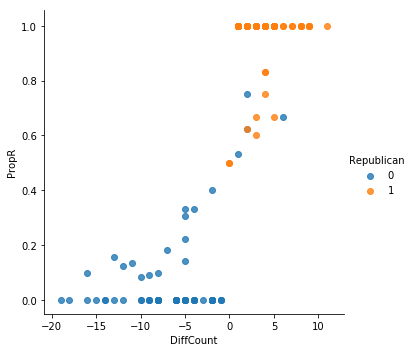

In [12]:
sns.lmplot('DiffCount','PropR',data=polling, fit_reg=False, hue='Republican', size=5, legend= True)

In [20]:
polling.isnull().sum()

State         0
Year          0
Rasmussen     0
SurveyUSA     0
DiffCount     0
PropR         0
Republican    0
dtype: int64

In [17]:
polling['Rasmussen'].fillna(polling['Rasmussen'].mean(), inplace = True)   # method 3
polling['SurveyUSA'].fillna(polling['SurveyUSA'].mean(), inplace = True)

In [18]:
polling.Republican.value_counts()

1    74
0    71
Name: Republican, dtype: int64

In [19]:
74/(74+71)

0.5103448275862069

In [21]:
#creat featuure matrix and target arry
x=polling.iloc[:,2:6]
x.head(10)

,Rasmussen,SurveyUSA,DiffCount,PropR
0,11.000000,18.000000,5,1.000000
1,21.000000,25.000000,5,1.000000
2,0.040404,-0.824324,1,1.000000
3,16.000000,-0.824324,6,1.000000
4,5.000000,15.000000,8,1.000000
5,5.000000,-0.824324,9,1.000000
6,8.000000,-0.824324,4,0.833333
7,7.000000,5.000000,8,1.000000
8,10.000000,-0.824324,5,1.000000
9,0.040404,-0.824324,2,1.000000


In [22]:
y=polling['Republican']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Republican, dtype: int64

In [36]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=88, stratify=y)

In [37]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((101, 4), (44, 4), (101,), (44,))

In [38]:
y_train.value_counts()

1    52
0    49
Name: Republican, dtype: int64

In [39]:
y_test.value_counts()

1    22
0    22
Name: Republican, dtype: int64

In [40]:
#modelbuilding--#
model=LogisticRegression()
model.fit(x_train[['Rasmussen','DiffCount']],y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [41]:
model.score(x_train[['Rasmussen','DiffCount']],y_train)

0.9603960396039604

In [48]:
#predict on train data
y_pred_train=model.predict(x_train[['Rasmussen','DiffCount']])

In [49]:
confusion_matrix(y_train,y_pred_train)

array([[45,  4],
       [ 0, 52]])

In [50]:
97/101

0.9603960396039604

In [51]:
pred_train=model.predict(x_train[['Rasmussen','DiffCount']])
pred_train

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [52]:
pred_train_prob=model.predict_proba(x_train[['Rasmussen','DiffCount']])
pred_train_prob[:5]

array([[1.07413594e-03, 9.98925864e-01],
       [1.00375972e-01, 8.99624028e-01],
       [8.39216372e-01, 1.60783628e-01],
       [9.93933290e-04, 9.99006067e-01],
       [1.03339769e-02, 9.89666023e-01]])

In [90]:
pred1_05=np.where(pred_train_prob[:,1]>=0.7,1,0)

In [91]:
pred1_05

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [93]:
confusion_matrix(y_train,pred1_05)

array([[46,  3],
       [ 8, 44]])

In [94]:
accuracy_score(y_train,pred1_05)

0.8910891089108911

In [53]:
pred_test=model.predict(x_test[['Rasmussen','DiffCount']])
pred_test

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [64]:
pred_test_prob=model.predict_proba(x_test[['Rasmussen','DiffCount']])
pred_test_prob[:8]

array([[4.10676780e-01, 5.89323220e-01],
       [8.17316559e-01, 1.82683441e-01],
       [5.62892145e-05, 9.99943711e-01],
       [3.41893197e-01, 6.58106803e-01],
       [4.98077522e-04, 9.99501922e-01],
       [9.99993932e-01, 6.06844547e-06],
       [9.89891671e-01, 1.01083290e-02],
       [2.41199882e-02, 9.75880012e-01]])

In [86]:
pred2=np.where(pred_test_prob[:,1]>=0.7,1,0)

In [87]:
pred2

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [88]:
confusion_matrix(y_test,pred2)

array([[22,  0],
       [ 7, 15]])

In [89]:
accuracy_score(y_test,pred2)

0.8409090909090909

In [96]:
roc_curve?

In [98]:
fpr,tpr,t = roc_curve(y_train, pred_train_prob[:,1],pos_label=1)

In [99]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
       0.02040816, 0.04081633, 0.06122449, 0.06122449, 0.08163265,
       0.2244898 , 0.32653061, 0.36734694, 0.44897959, 0.48979592,
       0.6122449 , 0.65306122, 0.93877551, 0.97959184, 1.        ])

In [100]:
tpr

array([0.        , 0.01923077, 0.05769231, 0.13461538, 0.17307692,
       0.23076923, 0.26923077, 0.28846154, 0.34615385, 0.38461538,
       0.38461538, 0.57692308, 0.65384615, 0.67307692, 0.75      ,
       0.76923077, 0.76923077, 0.84615385, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [101]:
t

array([1.99977897e+00, 9.99778969e-01, 9.99501922e-01, 9.99006067e-01,
       9.98925864e-01, 9.96502760e-01, 9.95895876e-01, 9.95754352e-01,
       9.95184187e-01, 9.94537872e-01, 9.91958748e-01, 9.58921654e-01,
       9.50834446e-01, 9.50530160e-01, 8.99624028e-01, 8.93601583e-01,
       8.69818343e-01, 8.05958697e-01, 6.58106803e-01, 6.19576595e-01,
       1.60783628e-01, 1.35539367e-02, 8.75983736e-03, 3.45321816e-03,
       3.22665346e-03, 5.52790298e-04, 5.21398886e-04, 4.55348766e-06,
       4.01208411e-06, 1.52326757e-07])

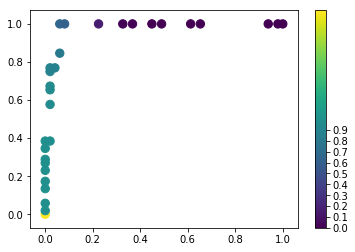

In [117]:
#plt.plot(fpr,tpr)
%matplotlib inline
#plt.figure(figsize=(5,5))
plt.scatter(fpr,tpr,c=t,s=70)
plt.colorbar(ticks=np.arange(0,1,0.1))
#plt.annotate(t,(fpr,tpr))
#ax = plt.gca()
#ax.annotate()

In [104]:
auc(fpr,tpr)    # Area under Curve for the model

0.9788069073783359

In [110]:
import matplotlib as mpl

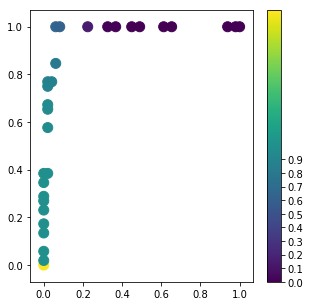

In [116]:
%matplotlib inline
plt.figure(figsize=(5,5))
plt.scatter(fpr,tpr,c=t,s=100)
plt.colorbar(ticks=np.arange(0,1,0.1),spacing= 'proportional')


In [107]:
auc(fpr,tpr)

0.9788069073783359

In [106]:
polling.corr()

,Year,Rasmussen,SurveyUSA,DiffCount,PropR,Republican
Year,1.000000,-0.056242,-0.182000,-0.187690,-0.114478,-0.127065
Rasmussen,-0.056242,1.000000,0.529721,0.497419,0.641346,0.616439
SurveyUSA,-0.182000,0.529721,1.000000,0.504853,0.610257,0.573299
DiffCount,-0.187690,0.497419,0.504853,1.000000,0.828518,0.801661
PropR,-0.114478,0.641346,0.610257,0.828518,1.000000,0.951283
Republican,-0.127065,0.616439,0.573299,0.801661,0.951283,1.000000


# model 2 with all variable

In [118]:
model2=LogisticRegression()
model2.fit(x_train,y_train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
model2.score(x_train,y_train)

0.9603960396039604

In [124]:
#predict on train data
y_pred_train1=model2.predict(x_train)
y_pred_train1

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [120]:
pred_train_prob1=model2.predict_proba(x_train)
pred_train_prob1[:5]

array([[1.74807642e-03, 9.98251924e-01],
       [9.52227179e-04, 9.99047773e-01],
       [8.59916508e-01, 1.40083492e-01],
       [6.38649219e-04, 9.99361351e-01],
       [1.71335914e-02, 9.82866409e-01]])

roc

In [125]:
fpr,tpr,t = roc_curve(y_train, pred_train_prob1[:,1],pos_label=1)

In [126]:
print(fpr)
print(tpr)

[0.         0.         0.         0.         0.         0.02040816
 0.02040816 0.02040816 0.04081633 0.04081633 0.06122449 0.06122449
 0.08163265 0.20408163 1.        ]
[0.         0.01923077 0.42307692 0.48076923 0.61538462 0.61538462
 0.75       0.78846154 0.78846154 0.86538462 0.86538462 1.
 1.         1.         1.        ]
[1.99999946e+00 9.99999458e-01 9.90995152e-01 9.89248467e-01
 9.68141955e-01 9.67559106e-01 8.91636732e-01 8.75965019e-01
 8.33376573e-01 8.14919374e-01 7.55938347e-01 7.32987414e-01
 5.45810416e-01 1.40083492e-01 1.76003074e-06]


In [127]:
print(t)


[1.99999946e+00 9.99999458e-01 9.90995152e-01 9.89248467e-01
 9.68141955e-01 9.67559106e-01 8.91636732e-01 8.75965019e-01
 8.33376573e-01 8.14919374e-01 7.55938347e-01 7.32987414e-01
 5.45810416e-01 1.40083492e-01 1.76003074e-06]


In [128]:
print(tpr)

[0.         0.01923077 0.42307692 0.48076923 0.61538462 0.61538462
 0.75       0.78846154 0.78846154 0.86538462 0.86538462 1.
 1.         1.         1.        ]


In [134]:
auc(fpr,tpr)

0.9850863422291993

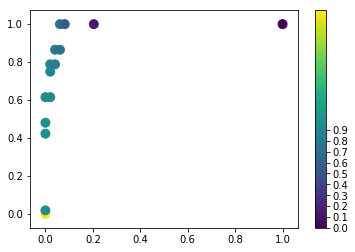

In [129]:
#plt.plot(fpr,tpr)
%matplotlib inline
#plt.figure(figsize=(5,5))
plt.scatter(fpr,tpr,c=t,s=80)
plt.colorbar(ticks=np.arange(0,1,0.1))
#plt.annotate(t,(fpr,tpr))
#ax = plt.gca()
#ax.annotate()

In [130]:
#prediction on the base of threshold
pred1_06=np.where(pred_train_prob1[:,1]>=0.8,1,0)

In [131]:
pred1_06

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [132]:
confusion_matrix(y_train,pred1_06)

array([[47,  2],
       [ 7, 45]])

In [133]:
accuracy_score(y_train,pred1_06)

0.9108910891089109

In [135]:
#predict on test data
pred_test_prob1=model2.predict_proba(x_test)
pred_test_prob1[:2]

array([[0.33206696, 0.66793304],
       [0.74941321, 0.25058679]])

In [137]:
pred1_test_06=np.where(pred_test_prob1[:,1]>=0.8,1,0)
pred1_test_06

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

In [138]:
confusion_matrix(y_test,pred1_test_06)

array([[22,  0],
       [ 6, 16]])

In [139]:
accuracy_score(y_test,pred1_test_06)

0.8636363636363636